In [1]:
%matplotlib inline

from simulation.community import Community, VoteConstraints
from simulation.student import Student
from simulation.artifact import Quality
from reputation.algorithm import allAlgorithms
from output.chart import chart
from output.metrics import printMetrics, printStdDevMetrics

# Productivity Test - High Competence


The more basic tests are concluded with the Productivity Test, which investigates
what kind of effect different levels of productivity, all other parameters being equal,
have on the reputation score.

In [2]:
testName = "Productivity-high"
community = Community()

### Actions

Action Prototypes


In [3]:
postGoodArtefact = community.createPostAction(Quality.GOOD)
postBadArtefact = community.createPostAction(Quality.BAD)
voteBadNegative = community.createVoteAction(Quality.BAD, VoteConstraints.BADART)
voteAnyNegative = community.createVoteAction(Quality.BAD, VoteConstraints.NONE)
voteGoodPositive = community.createVoteAction(Quality.GOOD, VoteConstraints.GOODART)
voteAnyPositive = community.createVoteAction(Quality.GOOD, VoteConstraints.NONE)

### Student Archetypes

Student with low productivity

In [4]:
lowStudent = Student("low",
        [
            (0.19, postGoodArtefact),
            (0.01, postBadArtefact),
            (0.38, voteBadNegative),
            (0.02, voteAnyNegative),
            (0.38, voteGoodPositive),
            (0.02, voteAnyPositive),
        ])
community.addStudents(lowStudent, 10)

Students with medium productivity

In [5]:
avgStudent = Student("avg",
        [
            (0.475, postGoodArtefact),
            (0.025, postBadArtefact),
            (0.2375, voteBadNegative),
            (0.0125, voteAnyNegative),
            (0.2375, voteGoodPositive),
            (0.0125, voteAnyPositive),
        ])
community.addStudents(avgStudent, 10)

Students with high productivity

In [6]:
highStudent = Student("high",
        [
            (0.76, postGoodArtefact),
            (0.04, postBadArtefact),
            (0.095, voteBadNegative),
            (0.005, voteAnyNegative),
            (0.095, voteGoodPositive),
            (0.005, voteAnyPositive),
        ])

community.addStudents(highStudent, 10)

## Synthesis

Reputation scores are based on 100 actions by the 30 students for 100 iterations. The charts and metrics are shown below.

Progress: [##################################################] 100.0%
######## Mean & Std. Dev.: InDegree ########
Distinction: 0.559739633075 ± 0.389995392883
Correctness: 0.314333333333 ± 0.0710641337885
Inversion Quality: 0.5308 ± 0.0708066537991

######## Mean & Std. Dev.: InDegreePositive ########
Distinction: 1.08183453155 ± 0.714400772745
Correctness: 0.874666666667 ± 0.0700983436165
Inversion Quality: 0.975866666667 ± 0.0177646340301

######## Mean & Std. Dev.: EigenTrust ########
Distinction: 0.742475349146 ± 0.549994971335
Correctness: 0.518 ± 0.0817067928633
Inversion Quality: 0.747966666667 ± 0.0642147352422

######## Mean & Std. Dev.: PageRank ########
Distinction: 0.85688415251 ± 0.592735813194
Correctness: 0.807666666667 ± 0.0689371694613
Inversion Quality: 0.9514 ± 0.0238894676932


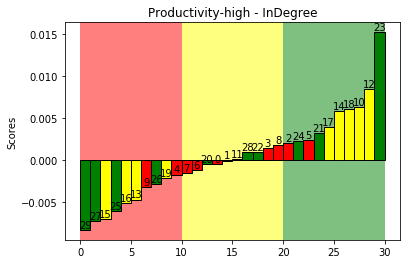

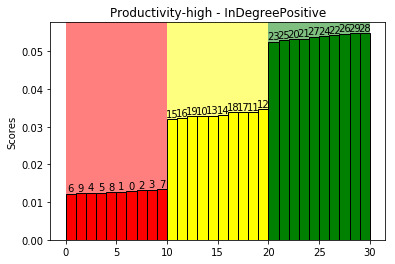

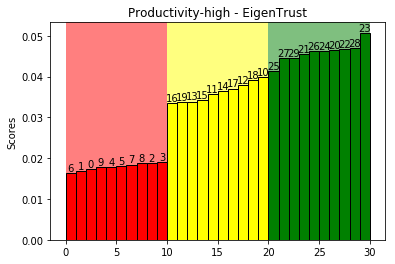

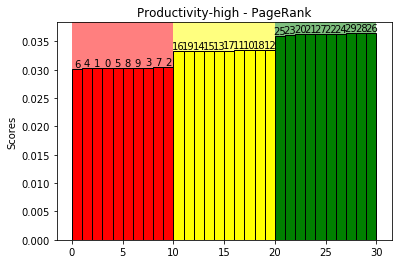

In [7]:
groups = ('low', 'avg', 'high')
colors = {'low': 'r', 'avg': 'yellow', 'high': 'g'}
results = community.run([InDegree(), InDegreePositive(), EigenTrust(), PageRank()], 100, 100)
for (name, result, intermediateResults) in results:
    c = chart(result, groups, colors, testName + " - " + name)
    # printMetrics(name, result, groups)
    printStdDevMetrics(name, intermediateResults, groups)